# **Group Project Topic : Glass or not glass**

**Group Member :**

*1. Ronak SInghvi*

*2. Man Rajkotiya*

*3. Shantanu Bakshi*

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt      # import library for plotting graphs
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import metrics

In [2]:
train = pd.read_csv('/content/train.csv')
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


In [3]:
print(train.shape)

(4500, 514)


In [4]:
train.info

<bound method DataFrame.info of         id       v1       v2       v3  ...     v510     v511     v512  glasses
0        1  0.37797 -0.94808  0.01346  ...  1.08635  1.69027  0.61609        0
1        2  0.07609 -0.09774  0.39666  ...  0.00866 -1.27640 -0.60496        1
2        3  1.19391 -0.68707 -0.68422  ... -0.60177  0.43555  0.41982        1
3        4  1.34949 -0.31498 -1.30248  ...  0.83997 -0.46986  0.06755        0
4        5 -0.03512 -0.34196  0.14230  ...  0.83641  0.59756 -0.20298        0
...    ...      ...      ...      ...  ...      ...      ...      ...      ...
4495  4496  0.54554  0.63002  1.99328  ...  0.57461  1.69958  0.43941        0
4496  4497 -0.26235  0.50776 -0.74164  ... -0.33767 -0.01251  0.06872        0
4497  4498 -0.81564 -0.46034 -0.40044  ...  0.14222  0.10394 -0.33635        1
4498  4499  0.09764 -0.05440 -1.53883  ... -0.25393  0.84022 -0.13068        1
4499  4500  0.48335  1.66099 -1.98407  ...  0.06201 -2.24746  0.17192        0

[4500 rows x 514 co

In [5]:
train.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,0.067560,-0.002083,0.078040,-0.024938,-0.029395,0.027814,-0.050992,0.121394,0.106751,0.001935,0.047460,-0.018330,-0.058942,0.055872,-0.083219,-0.023057,0.045138,0.080400,-0.032720,0.037929,0.016872,0.175460,0.086574,-0.088680,-0.054209,-0.019898,0.085469,-0.146745,-0.000734,-0.163095,...,0.013406,0.087366,-0.048248,-0.077322,-0.049410,0.018462,-0.036421,0.053984,-0.128585,-0.037571,-0.038897,0.082227,-0.075013,-0.074086,0.044075,0.009034,-0.207801,0.119168,-0.002119,0.023028,-0.082201,-0.060344,-0.088316,0.023726,0.088277,0.025180,-0.027934,0.067269,-0.020810,-0.115068,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,1299.182435,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,0.747827,0.714939,0.706872,0.663820,0.812123,0.755075,0.751805,0.772157,0.723660,0.758057,0.767998,0.712469,0.770689,0.754416,0.761771,0.773681,0.764593,0.735932,0.751691,0.776739,0.743376,0.767899,0.815652,0.763232,0.731656,0.746060,0.718874,0.770070,0.780750,0.745571,...,0.695161,0.696326,0.770055,0.681999,0.755388,0.738660,0.758322,0.713244,0.762161,0.752204,0.745001,0.753694,0.729876,0.771973,0.752416,0.766827,0.738646,0.724609,0.774068,0.750480,0.746982,0.809670,0.735013,0.692339,0.820121,0.757211,0.757624,0.748709,0.755673,0.735968,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,1.000000,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,-2.768610,-3.220590,-2.342850,-3.063600,-2.655160,-2.394360,-2.711950,-3.070490,-2.352870,-2.819900,-2.521800,-2.366830,-3.290500,-2.332010,-2.569310,-2.460720,-2.406860,-2.527720,-2.841720,-2.551610,-2.209130,-3.108830,-2.674820,-3.121610,-3.072380,-2.545570,-2.077640,-3.127940,-2.741990,-2.663210,...,-2.409010,-2.726200,-2.931060,-2.221200,-2.210510,-2.548280,-2.654120,-2.666030,-2.746630,-2.810960,-3.180610,-2.232400,-2.435070,-3.109640,-2.594380,-2.391540,-2.737760,-2.293100,-2.493990,-2.443920,-2.523910,-3.252070,-2.860860,-2.447960,-2.610140,-2.591580,-2.418330,-2.469600,-2.350780,-2.586140,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,1125.750000,-0.489807,-0.568788,-0.575425,-0.548003,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,-0.455873,-0.501383,-0.369287,-0.458875,-0.574332,-0.507650,-0.573000,-0.408225,-0.340958,-0.458318,-0.479683,-0.532473,-0.578270,-0.474053,-0.608855,-0.556867,-0.519232,-0.421403,-0.543945,-0.482272,-0.518310,-0.352270,-0.421890,-0.608073,-0.528593,-0

In [6]:
# check if there are the missing values 

train.isnull().sum()

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64

In [7]:
train_x1 = train.iloc[:,1:513]
train_y = train.iloc[:,513:]
# train_x
# trian_y

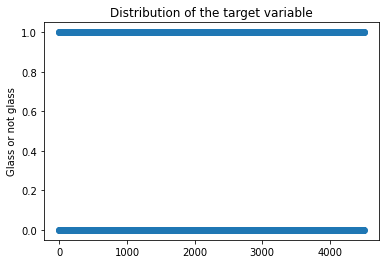

<Figure size 720x576 with 0 Axes>

In [8]:
# Plot Distribution of the target variable

plt.scatter(train_y.index,train_y.glasses)
plt.title("Distribution of the target variable")
plt.ylabel("Glass or not glass")
rcParams['figure.figsize']=10,8
plt.show()
plt.savefig('1.jpg')

In [9]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x1)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=42)

In [11]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# train2 = pca.fit_transform(train1)

In [12]:
x_train.shape

(3600, 512)

In [13]:
y_train.shape

(3600, 1)

In [14]:
x_test.shape

(900, 512)

In [15]:
y_test.shape

(900, 1)

# 1. Predicting output using SVM classifier

In [16]:
classifier_SVM = SVC(random_state=0)
classifier_SVM.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
y_pred_SVM = classifier_SVM.predict(x_test)

In [18]:
cross_val_score(classifier_SVM,train_x,train_y,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([1., 1., 1., 1., 1.])

In [19]:
cnf_matrix_SVM = confusion_matrix(y_pred_SVM,y_test)
cnf_matrix_SVM

array([[323,   0],
       [  0, 577]])

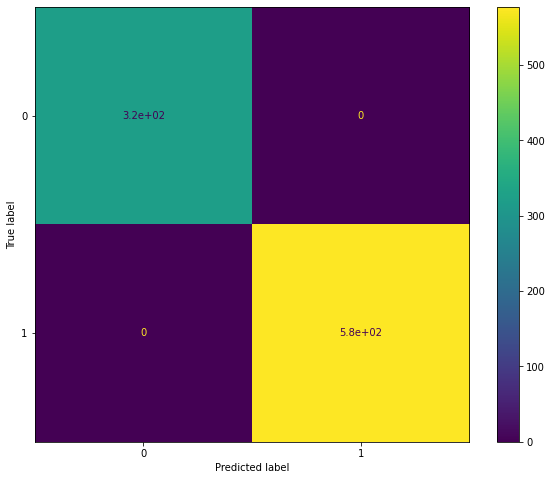

In [20]:
plot_confusion_matrix(classifier_SVM,x_test,y_test) 

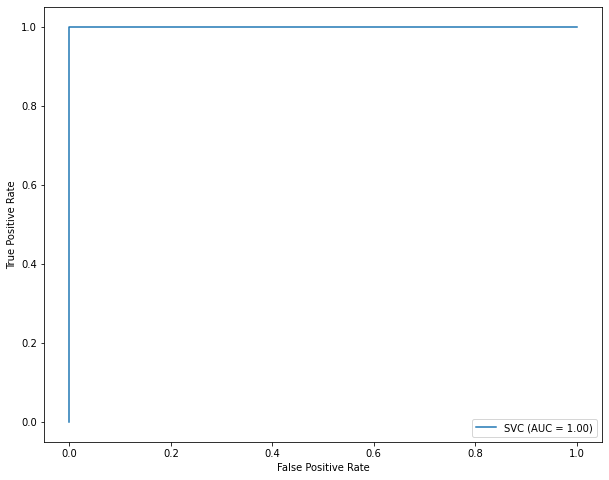

In [21]:
metrics.plot_roc_curve(classifier_SVM, x_test, y_test)

In [22]:
precision_recall_fscore_support(y_test, y_pred_SVM) 

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([323, 577]))

In [23]:
accuracy_score(y_test,y_pred_SVM)

1.0

In [24]:
classifier_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 2. Predicting output using KNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_pred_KNN = classifier_KNN.predict(x_test)

In [27]:
cross_val_score(classifier_KNN,train_x,train_y,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

array([1.        , 1.        , 0.99848024, 1.        , 1.        ])

In [28]:
cnf_matrix_KNN = confusion_matrix(y_pred_KNN,y_test)
cnf_matrix_KNN

array([[317,   0],
       [  6, 577]])

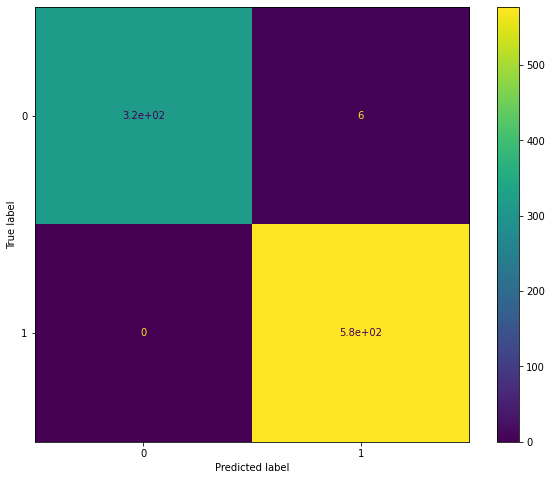

In [29]:
plot_confusion_matrix(classifier_KNN,x_test,y_test) 

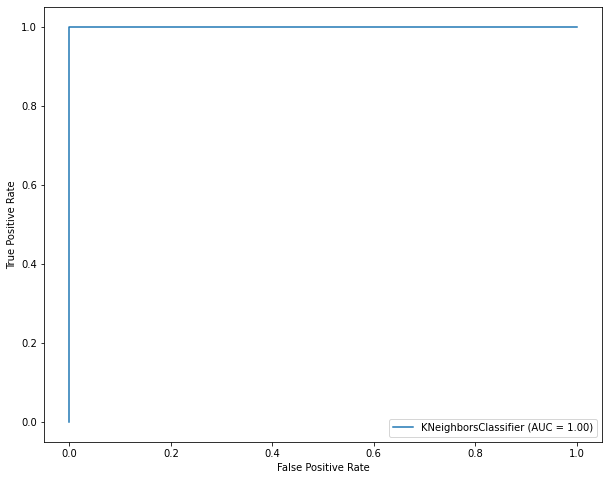

In [30]:
metrics.plot_roc_curve(classifier_KNN, x_test, y_test)

In [31]:
precision_recall_fscore_support(y_test, y_pred_KNN) 

(array([1.       , 0.9897084]),
 array([0.98142415, 1.        ]),
 array([0.990625  , 0.99482759]),
 array([323, 577]))

In [32]:
accuracy_score(y_pred_KNN,y_test)

0.9933333333333333

In [33]:
classifier_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# 3. Predicting output using Neural network classifier

In [34]:
from sklearn.neural_network import MLPClassifier
classifier_MLP = MLPClassifier(random_state=1, max_iter=300)
classifier_MLP.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [35]:
y_pred_MLP = classifier_MLP.predict(x_test)

In [36]:
cross_val_score(classifier_MLP,train_x,train_y,cv=5,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

array([1., 1., 1., 1., 1.])

In [37]:
cnf_matrix_MLP = confusion_matrix(y_pred_MLP,y_test)
cnf_matrix_MLP

array([[321,   0],
       [  2, 577]])

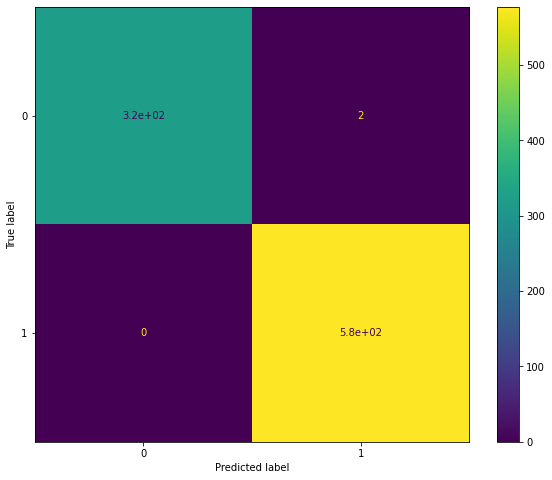

In [39]:
plot_confusion_matrix(classifier_MLP,x_test,y_test) 

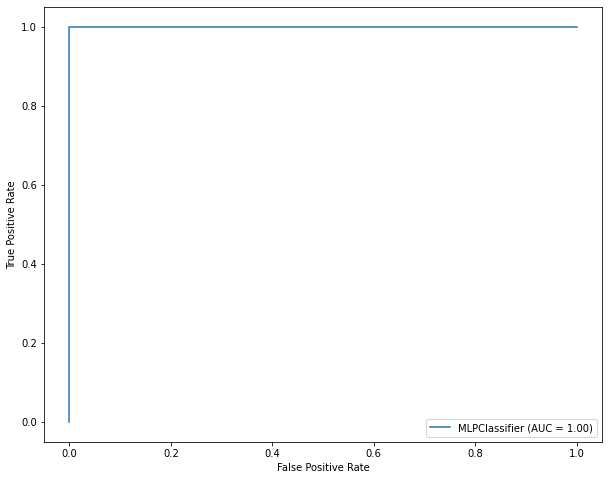

In [40]:
metrics.plot_roc_curve(classifier_MLP, x_test, y_test)

In [41]:
precision_recall_fscore_support(y_test, y_pred_MLP)

(array([1.        , 0.99654577]),
 array([0.99380805, 1.        ]),
 array([0.99689441, 0.9982699 ]),
 array([323, 577]))

In [42]:
accuracy_score(y_pred_MLP,y_test)

0.9977777777777778

In [43]:
classifier_MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**End of the Project**